In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import cv2

In [2]:
covid = [cv2.imread(file) for file in glob.glob('covid/*.jpeg')]


normal = [cv2.imread(file) for file in glob.glob('Normal/*.jpeg')]

In [3]:
# visulaization


cv2.imshow('first', covid[0])
cv2.waitKey(0)
cv2.destroyAllWindows()


cv2.imshow('first', normal[0])
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
# data presprocessing

# resize all the images in a common format
# dimension--> (300,300,3)

covid_data = [cv2.resize(image,(300,300)) for image in covid]


normal_data = [cv2.resize(image,(300,300)) for image in normal]



cv2.imshow('first', covid_data[0])
cv2.waitKey(0)
cv2.destroyAllWindows()


cv2.imshow('first', normal_data[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# let us store both the covid x-rays and the normal x-rays in a
# single master dataset


covid_data = np.array(covid_data)
normal_data = np.array(normal_data)

x = np.concatenate([covid_data,normal_data])

In [6]:
# label generation 

# we need to create certain labels to mark covid and normal images
# the AI algorithm witll use these labels to learn the 
# difference b/W a covid and normal image
# covid image-->1
# normal image-->0

covid_label = np.ones(46)
normal_label = np.zeros(70)


y = np.concatenate([covid_label,normal_label])

In [7]:
# shufling the dataset and spliting it into the training set
# and the test set
# train set--> traning the AI algorithm
# test set--> test the AI Algorithm

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [8]:
# train size 75%
# test size 25%

y_train_name = ['covid +ve' if i==1.0 else 'normal' for i in y_train]

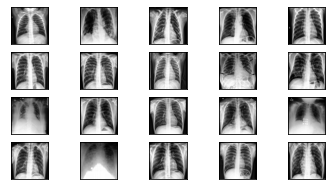

In [9]:
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],"gray")
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

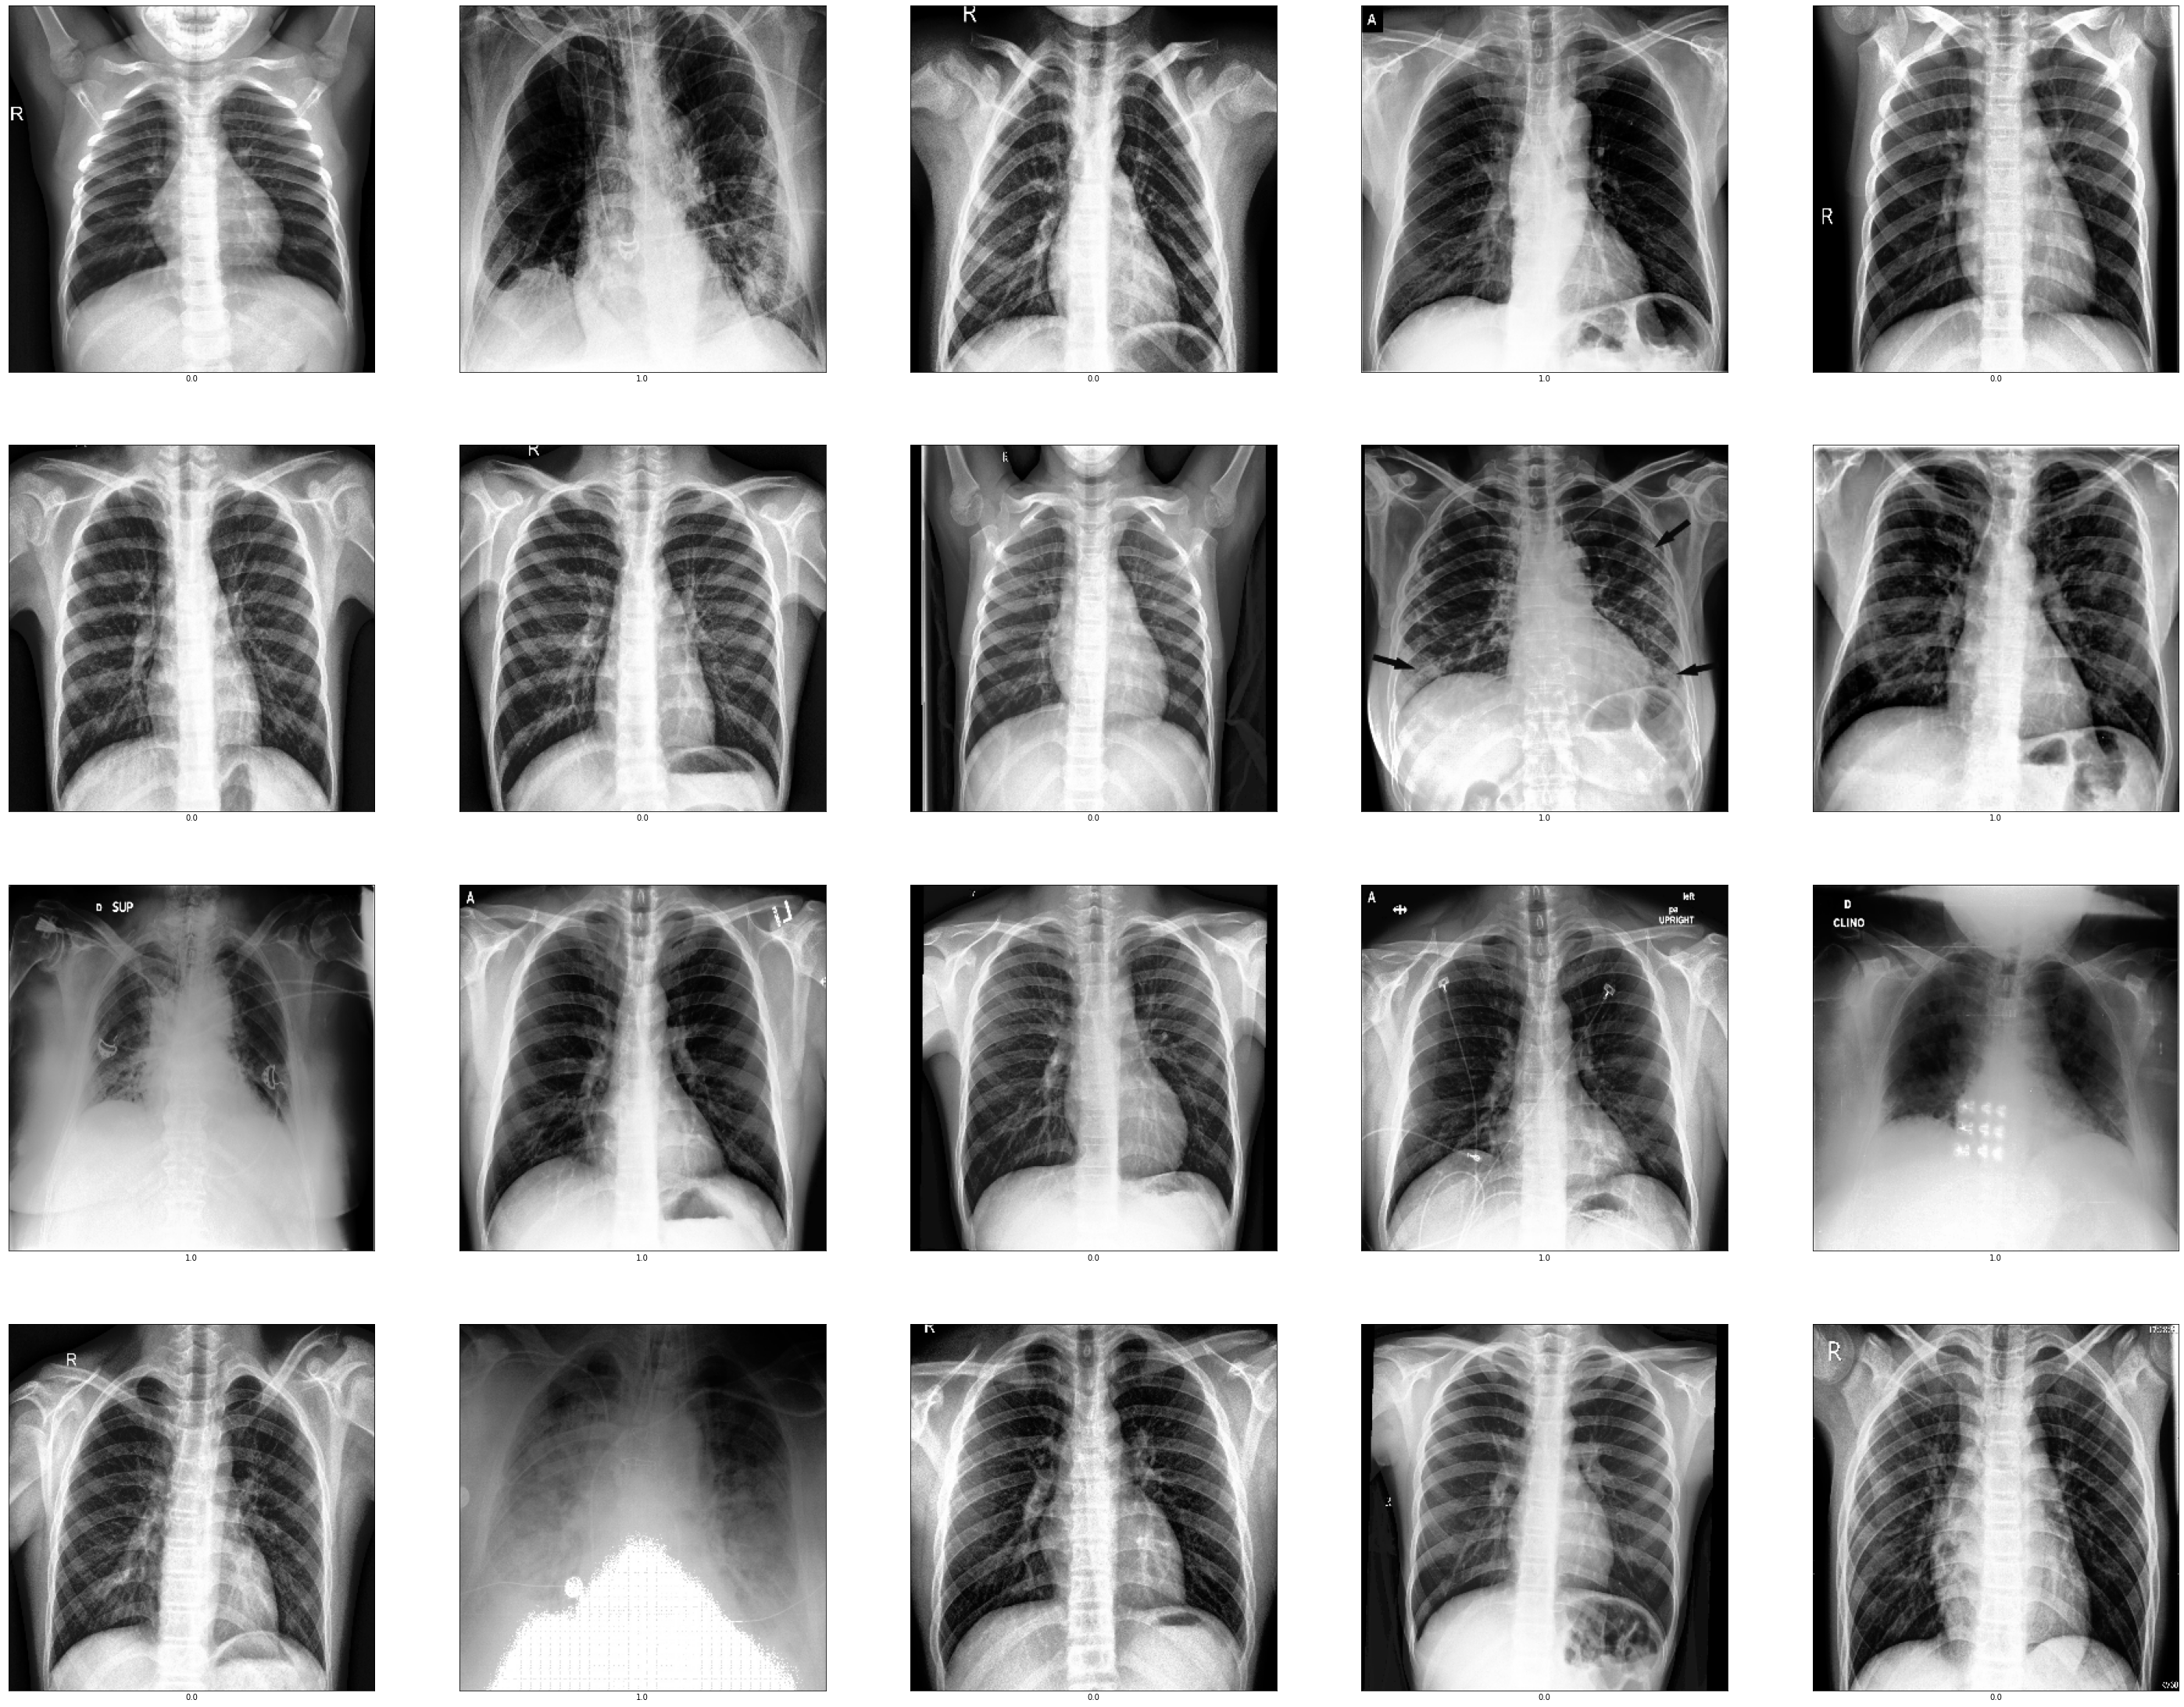

In [10]:
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],"gray")
    plt.xlabel(y_train[i])
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

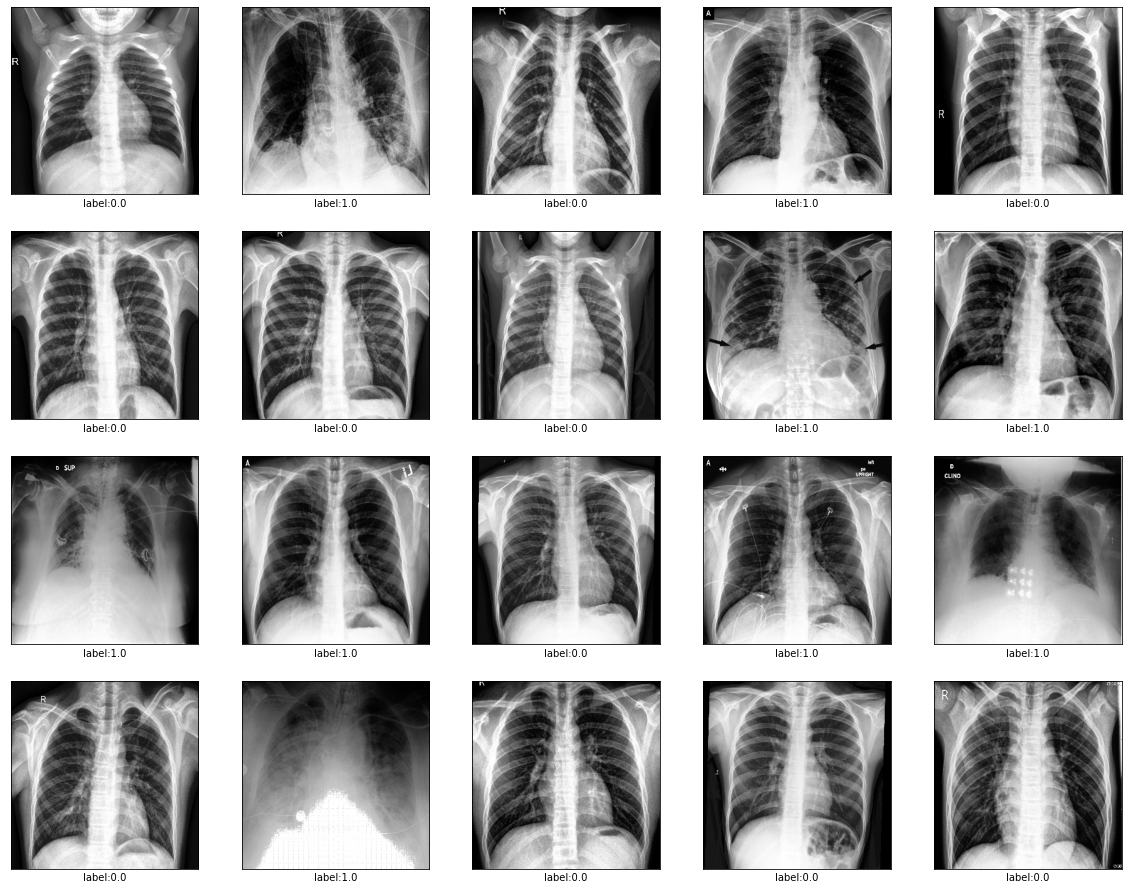

In [11]:
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],"gray")
    plt.xlabel('label:{}'.format(y_train[i]))
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [12]:
# reshape and change the data 2d so that a ml algo can work with it

x_train = x_train.reshape(87,270000)
x_test = x_test.reshape(29,270000)

In [13]:
# apply random forest algorithm application

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

rf.score(x_test,y_test)


y_pred_name  = ['covid +ve' if i ==1.0 else 'normal' for i in y_pred]

y_test_name  = ['covid +ve' if i ==1.0 else 'normal' for i in y_test]

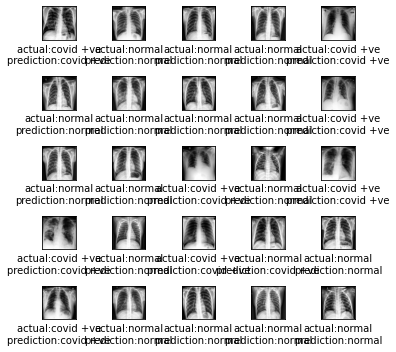

In [14]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(300,300,3),"gray")
    plt.xlabel('actual:{}\nprediction:{}'.format(y_test_name[i],y_pred_name[i]))
plt.rcParams['figure.figsize'] = [20, 20]
plt.tight_layout()
plt.show()

In [15]:
#checking accuracy
from sklearn.metrics import accuracy_score
y_pred_test = rf.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.9655172413793104